In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from math import trunc
from psycopg2 import sql
import assets.script as scr
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from pathlib import Path

### Example `script.py` Use

In [2]:
x = [np.random.randn(10) for i in range(100)]
y = np.random.randint(1, 100, 100)

In [3]:
df = pd.DataFrame(x, columns=['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
df = df.join(pd.Series(y, name='target'))

In [4]:
X_train, X_test, y_train, y_test = scr.split_data(df, target='target')


No columns dropped.

Target values: [87 15 46 87 62 76 14 64 32 99 99 69 25 30  2 88 13 72  3 77 83  3 25 91
 71 15 47 13 35 35 69 75 21 31 95  3 30 80 29 80 11 41 32 13 99 79 61 70
 58 12 42 22 27 71 84 62 30 99 32 65 43 46 65 93 59 75 55 24 62 42 55 55
 34 51 68 98 30 69 87 27 32 70 38 33 88 53 99 48 90 13 92 98 83 79 48 98
 44 64 21 43] 

Column(s) remaining: Index(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight',
       'nine', 'target'],
      dtype='object')

Data is unscaled.
training sample size:  80
testing sample size:  20


In [5]:
y_pred, y_prob = scr.get_predictions(GaussianNB(), X_train, y_train, X_test)

## Midterm Project

#### Goals

The goal is to `predict arrival delays` of commercial flights. Often, there isn't much airlines can do to avoid the delays, which are often costly and . It is critical for airlines to estimate flight delays as accurate as possible because the results can be applied to improvements in customer satisfaction and income of airline agencies.

#### SQL Query

In [6]:
table_name = 'flights'
limit = 10000

query = sql.SQL(
    "SELECT DISTINCT fl_date \
        FROM {table} \
        WHERE fl_date IS NOT NULL \
        ORDER BY fl_date \
        LIMIT {limit};").format(
        table = sql.Identifier(table_name),
        limit = sql.Literal(limit)
        ,
    )
    
filename = 'flights_unique_fl_dates_10k_sample.csv'

In [7]:
scr.sql_read_tables()

0             flights
1        flights_test
2    fuel_comsumption
3         pass_sample
4          passengers
5              sample
6           temptable
7          test_table
dtype: object

In [8]:
df_flights = scr.make_csv(query, filename, overwrite=False)

File exists. Returning DataFrame...


In [9]:
df_flights['fl_date']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
725    2019-12-27
726    2019-12-28
727    2019-12-29
728    2019-12-30
729    2019-12-31
Name: fl_date, Length: 730, dtype: object

# TABLES

### Table **flights**

In [10]:
df_flights = pd.read_csv(Path('./data') / 'flights_100k_sample.csv')
df_flights['flights'].unique()

array([1.])

In [11]:
for col in df_flights.columns:
    print(col,len(df_flights[col].unique()))
    print(df_flights[col].unique())

fl_date 6
['2018-08-31' '2019-10-01' '2019-10-02' '2019-10-03' '2019-10-04'
 '2019-10-05']
mkt_unique_carrier 10
['WN' 'AA' 'DL' 'UA' 'AS' 'G4' 'NK' 'B6' 'HA' 'F9']
branded_code_share 15
['WN' 'AA_CODESHARE' 'AA' 'DL_CODESHARE' 'UA_CODESHARE' 'DL'
 'AS_CODESHARE' 'G4' 'NK' 'B6' 'UA' 'HA' 'HA_CODESHARE' 'AS' 'F9']
mkt_carrier 10
['WN' 'AA' 'DL' 'UA' 'AS' 'G4' 'NK' 'B6' 'HA' 'F9']
mkt_carrier_fl_num 6328
[5490 1520 2138 ... 3953 4337 4087]
op_unique_carrier 26
['WN' 'YV' 'AA' 'YX' 'OH' '9E' 'ZW' 'PT' 'DL' 'CP' 'OO' 'QX' 'EV' 'MQ'
 'G4' 'NK' 'KS' 'B6' 'UA' 'HA' 'EM' 'AS' 'G7' 'C5' 'AX' 'F9']
tail_num 5512
['N798SW' 'N964WN' 'N920WN' ... 'N781AN' 'N729AN' 'N176DN']
op_carrier_fl_num 6328
[5490 1520 2138 ... 3953 4337 4087]
origin_airport_id 366
[11292 11423 11433 11481 11540 11618 11697 11884 11986 11996 12191 12206
 12264 12278 12339 12391 12451 12889 12892 12896 12953 12954 12992 13158
 13198 13204 13232 13244 13296 13342 13487 13495 13796 13851 13871 13891
 13931 14027 14057 14100 14107

- **`fl_date`**: Flight Date (yyyy-mm-dd)
- **`mkt_unique_carrier`**: Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
- **`branded_code_share`**: Reporting Carrier Operated or Branded Code Share Partners
- **`mkt_carrier`**: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
- **`mkt_carrier_fl_num`**: Flight Number
- **`op_unique_carrier`**: Unique Scheduled Operating Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users,for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
- **`tail_num`**: Tail Number
- **`op_carrier_fl_num`**: Flight Number
- **`origin_airport_id`**: Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
- **`origin`**: Origin Airport
- **`origin_city_name`**: Origin Airport, City Name
- **`dest_airport_id`**: Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
- **`dest`**: Destination Airport
- **`dest_city_name`**: Destination Airport, City Name
- **`crs_dep_time`**: CRS Departure Time (local time: hhmm)
- **`dep_time`**: Actual Departure Time (local time: hhmm)
- **`dep_delay`**: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.	
- **`taxi_out`**: Taxi Out Time, in Minutes
- **`wheels_off`**: Wheels Off Time (local time: hhmm)
- **`wheels_on`**: Wheels On Time (local time: hhmm)
- **`taxi_in`**: 	Taxi In Time, in Minutes
- **`crs_arr_time`**: CRS Arrival Time (local time: hhmm)
- **`arr_time`**: Actual Arrival Time (local time: hhmm)
- **`arr_delay`**: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
- **`cancelled`**: Cancelled Flight Indicator (1=Yes)
- **`cancellation_code`**: Specifies The Reason For Cancellation
- **`diverted`**: Diverted Flight Indicator (1=Yes)
- **`dup`**: Duplicate flag marked Y if the flight is swapped based on Form-3A data
- **`crs_elapsed_time`**: CRS Elapsed Time of Flight, in Minutes
- **`actual_elapsed_time`**: Elapsed Time of Flight, in Minutes
- **`air_time`**: Flight Time, in Minutes
- **`flights`**: Number of Flights
- **`distance`**: Distance between airports (miles)
- **`carrier_delay`**: Carrier Delay, in Minutes
- **`weather_delay`**: Weather Delay, in Minutes
- **`nas_delay`**: National Air System Delay, in Minutes
- **`security_delay`**: Security Delay, in Minutes
- **`late_aircraft_delay`**: Late Aircraft Delay, in Minutes
- **`first_dep_time`**: First Gate Departure Time at Origin Airport
- **`total_add_gtime`**: Total Ground Time Away from Gate for Gate Return or Cancelled Flight
- **`longest_add_gtime`**: Longest Time Away from Gate for Gate Return or Cancelled Flight

### Table **passengers**

In [12]:
df_passengers = pd.read_csv(Path('./data') / 'passengers_100k_sample.csv')
df_passengers

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,1.0,2000.0,8.0,2.0,0.0,0.0,871.0,137.0,122.0,...,US,United States,6,684,1,2017,8,2,L,DU
1,0.0,1.0,2800.0,14.0,13.0,0.0,0.0,381.0,78.0,66.0,...,US,United States,7,770,1,2017,8,1,L,DU
2,0.0,1.0,2000.0,7.0,2.0,0.0,0.0,2430.0,297.0,283.0,...,US,United States,6,651,1,2017,8,5,L,DU
3,0.0,1.0,2000.0,7.0,5.0,0.0,0.0,353.0,90.0,53.0,...,US,United States,6,651,1,2017,8,1,L,DU
4,0.0,2.0,4000.0,16.0,4.0,0.0,0.0,353.0,138.0,116.0,...,US,United States,6,684,1,2017,8,1,L,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,21.0,114975.0,147.0,79.0,0.0,0.0,259.0,1443.0,1105.0,...,US,United States,6,642,1,2017,4,1,L,DU
99996,0.0,12.0,36000.0,96.0,52.0,0.0,0.0,259.0,761.0,611.0,...,US,United States,6,663,1,2017,4,1,L,DU
99997,0.0,1.0,12343.0,30.0,27.0,0.0,0.0,110.0,38.0,25.0,...,US,United States,6,669,1,2017,4,1,L,DU
99998,0.0,1.0,4353.0,12.0,7.0,0.0,0.0,1088.0,131.0,122.0,...,US,United States,6,652,1,2017,4,3,L,DU


In [13]:
df_passengers['month'].unique()

array([ 8,  5,  1,  9,  3,  6,  7, 10, 11, 12,  2,  4])

In [14]:
for i,cls in df_passengers[df_passengers['class'] == 'L']['class'].iteritems():
    df_passengers.loc[i, 'class'] = 'G'

In [15]:
len(df_passengers['unique_carrier_name'].unique())

292

In [16]:
count = []
for carrier in df_passengers['unique_carrier'].unique():
    count.append(df_passengers[df_passengers[['unique_carrier', 'airline_id', 'unique_carrier_name']]['unique_carrier'] == carrier]['airline_id'].unique())

len(df_passengers['airline_id'].unique())

292

- **`departures_scheduled`**: Departures Scheduled
- **`departures_performed`**: Departures Performed
- **`payload`**: Available Payload (pounds)
  - **`seats`**: Available Seats
- **`passengers`**: Non-Stop Segment Passengers Transported
  - **`freight`**: Non-Stop Segment Freight Transported (pounds)
  - **`mail`**: Non-Stop Segment Mail Transported (pounds)
- **`distance`**: Distance between airports (miles)
- **`ramp_to_ramp`**: Ramp to Ramp Time (minutes)
  - **`air_time`**: Airborne Time (minutes)
- **`unique_carrier`**: Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
- **`airline_id`**: An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.
- **`unique_carrier_name`**: Unique Carrier Name. When the same name has been used by multiple carriers, a numeric suffix is used for earlier users, for example, Air Caribbean, Air Caribbean (1).
- **`region`**: Carrier's Operation Region. Carriers Report Data by Operation Region
- **`carrier`**: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
- **`carrier_name`**: Carrier Name
- **`carrier_group`**: Carrier Group Code
- **`carrier_group_new`**: Carrier Group New
- **`origin_airport_id`**: Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
- **`origin_city_market_id`**: Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.	
- **`origin`**: Origin Airport
- **`origin_city_name`**: Origin City
- **`origin_country`**: Origin Country Code
- **`origin_country_name`**: Origin Country
- **`dest_airport_id`**: Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
- **`dest_city_market_id`**: Destination Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.
- **`dest`**: Destination Airport
- **`dest_city_name`**: Destination City
- **`dest_country`**: Destination Country Code
- **`dest_country_name`**: Destination Country
- **`aircraft_group`**: Aircraft Group
- **`aircraft_type`**: Aircraft Type
- **`aircraft_config`**: Aircraft Configuration
- **`month`**: Month
- **`year`**: Year
- **`distance_group`**: Distance Intervals, every 500 Miles, for Flight Segment
- **`class`**: Service Class

### Table **fuel_comsumption**

In [17]:
df_fuel_comsumption = pd.read_csv(Path('./data') / 'fuel_comsumption_100k_sample.csv')
df_fuel_comsumption

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,12,20377.0,X9,X9,Omni Air International LLC,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1584314.0,4588387.0,6172701.0,2018
3031,12,20207.0,XP,XP,XTRA Airways,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3032,12,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3033,12,20452.0,YX,YX,Republic Airline,2,21048.0,0.0,0.0,0.0,...,50043.0,0.0,0.0,0.0,0.0,50043.0,50043.0,0.0,50043.0,2018


- **`month`**: Month
- **`airline_id`**: An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.
- **`unique_carrier`**: Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
- **`carrier`**: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
- **`carrier_name`**: Carrier Name
- **`carrier_group_new`**: Carrier Group New
- **`sdomt_gallons`**: Total Scheduled Domestic, Fuel Consumption (Gallons)
- **`satl_gallons`**: Scheduled Service International Atlantic - Fuel Consumption (Gallons)
- **`spac_gallons`**: Scheduled Service International Pacific - Fuel Consumption (Gallons)
- **`slat_gallons`**: Scheduled Service International Latin America - Fuel Consumption (Gallons)
- **`sint_gallons`**: Scheduled Service International Subtotal - Fuel Consumption (Gallons)
- **`ts_gallons`**: Total Scheduled Service - Fuel Consumption (Gallons)
- **`tdomt_gallons`**: Total Domestic - Fuel Consumption (Gallons)
- **`tint_gallons`**: Total International - Fuel Consumption (Gallons)
- **`total_gallons`**: Grand Total - Fuel Consumption (Gallons)
- **`sdomt_cost`**: Total Scheduled Domestic, Fuel Cost (Dollars)
- **`satl_cost`**: Scheduled Service International Atlantic - Fuel Cost (Dollars)
- **`spac_cost`**: Scheduled Service International Pacific - Fuel Cost (Dollars)
- **`slat_cost`**: Scheduled Service International Latin America - Fuel Cost (Dollars)
- **`sint_cost`**: Scheduled Service International Subtotal - Fuel Cost (Dollars)
- **`ts_cost`**: Total Scheduled Service - Fuel Cost (Dollars)
- **`tdomt_cost`**: Total Domestic - Fuel Cost (Dollars)
- **`tint_cost`**: Total International - Fuel Cost (Dollars)
- **`total_cost`**: Grand Total - Fuel Cost (Dollars)
- **`year`**: year

### Table **flights_test**


This table consists of subset of columns from table flights. It represents flights from January 2020 which will be used for evaluation. Therefore, we are missing some features that we are not suppossed to know before the flight lands.

- **`fl_date`**: Flight Date (yyyy-mm-dd)
- **`mkt_unique_carrier`**: Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
- **`branded_code_share`**: Reporting Carrier Operated or Branded Code Share Partners
- **`mkt_carrier`**: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
- **`mkt_carrier_fl_num`**: Flight Number
- **`op_unique_carrier`**: Unique Scheduled Operating Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users,for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
- **`tail_num`**: Tail Number
- **`op_carrier_fl_num`**: Flight Number
- **`origin_airport_id`**: Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
- **`origin`**: Origin Airport
- **`origin_city_name`**: Origin Airport, City Name
- **`dest_airport_id`**: Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
- **`dest`**: Destination Airport
- **`dest_city_name`**: Destination Airport, City Name
- **`crs_dep_time`**: CRS Departure Time (local time: hhmm)
- **`crs_arr_time`**: CRS Arrival Time (local time: hhmm)
- **`dup`**: Duplicate flag marked Y if the flight is swapped based on Form-3A data
- **`crs_elapsed_time`**: CRS Elapsed Time of Flight, in Minutes
- **`flights`**: Number of Flights
- **`distance`**: Distance between airports (miles)

# To Predict Flight Delay

Target variable is `arr_delay`

In [18]:
df_flights_by_month = pd.DataFrame()

for i in range(0,12):
    df_flights_by_month = pd.concat([df_flights_by_month, scr.sql_search_date(table='flights', y=2019, m=i+1).sort_values(by='fl_date')])

File exists. Returning DataFrame...
File exists. Returning DataFrame...
File exists. Returning DataFrame...
File exists. Returning DataFrame...
File exists. Returning DataFrame...
File exists. Returning DataFrame...
File exists. Returning DataFrame...
File exists. Returning DataFrame...
File exists. Returning DataFrame...
File exists. Returning DataFrame...
File exists. Returning DataFrame...
File exists. Returning DataFrame...


In [19]:
df_flights_by_month.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [20]:
len(df_flights_by_month['tail_num'].unique())

4874

In [21]:
df_flights_by_month = df_flights_by_month[[
    'fl_date',
    'mkt_unique_carrier',
    'origin',
    'origin_city_name',
    'dest',
    'crs_dep_time', 
    'dep_time',
    'taxi_out',
    'taxi_in',
    'crs_arr_time',
    'arr_delay',
    'arr_time',
    'cancelled',
    'cancellation_code',
    'crs_elapsed_time',
    'actual_elapsed_time',
    'distance']]

In [22]:
# df_flights_by_month['total_delay'] = (df_flights_by_month['dep_time'] - df_flights_by_month['crs_dep_time']) + (df_flights_by_month['arr_time'] - df_flights_by_month['crs_arr_time']) + (df_flights_by_month['actual_elapsed_time'] - df_flights_by_month['crs_elapsed_time'])

In [23]:
df_flights_by_month = df_flights_by_month[df_flights_by_month['cancelled'] != 1]

In [24]:
df_flights_by_month.columns

Index(['fl_date', 'mkt_unique_carrier', 'origin', 'origin_city_name', 'dest',
       'crs_dep_time', 'dep_time', 'taxi_out', 'taxi_in', 'crs_arr_time',
       'arr_delay', 'arr_time', 'cancelled', 'cancellation_code',
       'crs_elapsed_time', 'actual_elapsed_time', 'distance'],
      dtype='object')

In [25]:
df_flights_by_month = df_flights_by_month[
       ['fl_date',
       'mkt_unique_carrier', 'origin', 'origin_city_name', 'dest', 'crs_dep_time',
       'dep_time', 'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_delay', 'arr_time',
       'cancelled', 'cancellation_code', 'crs_elapsed_time',
       'actual_elapsed_time', 'distance']]

In [26]:
# same columns between df_flights and df_passengers
print(np.intersect1d(df_flights_by_month.columns, df_passengers.columns))

['dest' 'distance' 'origin' 'origin_city_name']


In [27]:
# same columns between df_passengers and df_compsumption
print(np.intersect1d(df_passengers.columns, df_fuel_comsumption.columns))

['airline_id' 'carrier' 'carrier_group_new' 'carrier_name' 'month'
 'unique_carrier' 'year']


In [28]:
# same columns between df_flights and df_comsumption
print(np.intersect1d(df_flights_by_month.columns, df_fuel_comsumption.columns))

[]


In [29]:
df_flights_by_month['mkt_unique_carrier'].unique()

array(['AA', 'DL', 'WN', 'UA', 'NK', 'G4', 'AS', 'B6', 'HA', 'F9'],
      dtype=object)

In [30]:
df_flights_by_month =df_flights_by_month.drop(['cancellation_code', 'cancelled', 'dep_time', 'crs_dep_time', 'arr_time', 'crs_arr_time', 'actual_elapsed_time', 'crs_elapsed_time'], axis = 1)

In [31]:
df_flights_by_month = df_flights_by_month.reset_index(drop=True)

In [32]:
# merge tables using month and year

# make month column
for i,date in enumerate(df_flights_by_month['fl_date']):
    df_flights_by_month.loc[i, 'month'] = dt.datetime.strptime(df_flights_by_month.loc[i, 'fl_date'], '%Y-%m-%d').month
    df_flights_by_month.loc[i, 'year'] = dt.datetime.strptime(df_flights_by_month.loc[i, 'fl_date'], '%Y-%m-%d').year

In [33]:
df_flights_by_month['month'] = df_flights_by_month['month'].astype(int)
df_flights_by_month['year'] = df_flights_by_month['year'].astype(int)

In [34]:
df_flights_by_month.sort_values(by='fl_date')

,fl_date,mkt_unique_carrier,origin,origin_city_name,dest,taxi_out,taxi_in,arr_delay,distance,month,year
0,2019-01-01,AA,SEA,"Seattle, WA",JFK,19.0,8.0,-18.0,2422.0,1,2019
30,2019-01-01,DL,HOU,"Houston, TX",ATL,11.0,12.0,-13.0,696.0,1,2019
29,2019-01-01,UA,SFO,"San Francisco, CA",OGG,23.0,5.0,-43.0,2338.0,1,2019
28,2019-01-01,UA,ORD,"Chicago, IL",LAX,13.0,9.0,74.0,1744.0,1,2019
27,2019-01-01,AA,PWM,"Portland, ME",DCA,10.0,4.0,-13.0,482.0,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
11774,2019-12-31,AA,DFW,"Dallas/Fort Worth, TX",MEM,14.0,6.0,-9.0,431.0,12,2019
11773,2019-12-31,AA,PHX,"Phoenix, AZ",YUM,17.0,3.0,56.0,160.0,12,2019
11802,2019-12-31,WN,OAK,"Oakland, CA",ONT,8.0,6.0,8.0,362.0,12,2019
11787,2019-12-31,UA,MEM,"Memphis, TN",IAH,15.0,17.0,-10.0,468.0,12,2019


In [35]:
df_passengers.shape

(100000, 38)

In [36]:
# same columns between df_flights and df_passengers
merge_on = list(np.intersect1d(df_flights_by_month.columns, df_passengers.columns))
merge_on

['dest', 'distance', 'month', 'origin', 'origin_city_name', 'year']

In [37]:
df_passengers['class'].unique()

array(['G', 'F', 'P'], dtype=object)

In [38]:
df_flights_pass = pd.merge(
    df_flights_by_month,
    df_passengers[[
        'departures_performed',
        'seats',
        'passengers',
        'freight',
        'payload',
        'air_time',
        'airline_id',
        'carrier',
        'origin',
        'dest',
        'distance',
        'aircraft_group',
        'aircraft_type',
        'aircraft_config',
        'class'
        ]])

In [39]:
print(df_flights_pass.shape)
print(df_fuel_comsumption.shape)

(66043, 23)
(3035, 25)


In [40]:
df_fuel_comsumption['carrier_group_new'].unique()

array([1, 3, 2])

In [41]:
df_flights_pass_fuel = pd.merge(
    df_flights_pass, df_fuel_comsumption[[
        'month',
        'airline_id',
        'carrier',
        'carrier_name',
        'carrier_group_new',
        'total_gallons',
        'total_cost',
        'year']])

In [42]:
df_flights_pass_fuel.columns.to_list()

['fl_date',
 'mkt_unique_carrier',
 'origin',
 'origin_city_name',
 'dest',
 'taxi_out',
 'taxi_in',
 'arr_delay',
 'distance',
 'month',
 'year',
 'departures_performed',
 'seats',
 'passengers',
 'freight',
 'payload',
 'air_time',
 'airline_id',
 'carrier',
 'aircraft_group',
 'aircraft_type',
 'aircraft_config',
 'class',
 'carrier_name',
 'carrier_group_new',
 'total_gallons',
 'total_cost']

In [43]:
# cleanup
# df_flights_pass_fuel.sort_values(by='fl_date').dropna(inplace=True)

### Get dummy values

In [44]:
df_flights_pass_fuel = pd.get_dummies(df_flights_pass_fuel, drop_first=True, columns=['class', 'aircraft_group', 'aircraft_type', 'aircraft_config', 'carrier_group_new', 'mkt_unique_carrier'], dummy_na=True)

### Get weather data and incorporate into existing DataFrame

In [45]:
df_weather = pd.read_csv('weather.csv').drop(columns=['Unnamed: 0', 'condition'])
df_weather = pd.get_dummies(df_weather, columns=['cond_desc'])
df_weather = df_weather.groupby(['location', 'date']).aggregate('sum')

In [46]:
df_weather.reset_index(inplace=True)

In [47]:
df_flights_pass_weather = pd.merge(
    df_flights_pass_fuel.rename(columns={'fl_date' : 'date', 'origin_city_name' : 'location'}),
    df_weather.drop(columns=['day/night']),
    how='left'
    )

In [48]:
df_flights_pass_weather.dropna(inplace=True)
df_flights_pass_weather = df_flights_pass_weather.groupby(['date', 'location']).aggregate('mean').astype(int)

In [49]:
df_flights_pass_weather.reset_index(inplace=True)

### Develop weekend columns to account for date

In [50]:
df_flights_pass_weather['weekday'] = ((pd.DatetimeIndex(df_flights_pass_weather['date']).dayofweek) // 5 == 1).astype(int)

In [51]:
df_flights_pass_weather.drop(columns=['date', 'location', 'year', 'mkt_unique_carrier_nan'], inplace=True)
df_flights_pass_weather.rename(columns={
    'departures_performed' : 'departures',
    'mkt_unique_carrier_HA' : 'carrier_HA',
    'mkt_unique_carrier_NK' : 'carrier_NK',
    'mkt_unique_carrier_UA' : 'carrier_UA',
    'mkt_unique_carrier_WN' : 'carrier_WN',
    'cond_desc_cloudy' : 'weather_cloudy',
    'cond_desc_rain' : 'weather_rain',
    'cond_desc_snow' : 'weather_snow',
    'cond_desc_sunny' : 'weather_sunny',
    'mkt_unique_carrier_AS' : 'carrier_AS',
    'mkt_unique_carrier_B6' : 'carrier_B6',
    'mkt_unique_carrier_DL' : 'carrier_DL',
    'mkt_unique_carrier_F9' : 'carrier_F9',
    'mkt_unique_carrier_G4' : 'carrier_G4'
}, inplace=True)

In [52]:
df_flights_pass_weather.columns.to_list()

['taxi_out',
 'taxi_in',
 'arr_delay',
 'distance',
 'month',
 'departures',
 'seats',
 'passengers',
 'freight',
 'payload',
 'air_time',
 'airline_id',
 'total_gallons',
 'total_cost',
 'class_G',
 'class_P',
 'class_nan',
 'aircraft_group_2.0',
 'aircraft_group_3.0',
 'aircraft_group_4.0',
 'aircraft_group_5.0',
 'aircraft_group_6.0',
 'aircraft_group_7.0',
 'aircraft_group_8.0',
 'aircraft_group_nan',
 'aircraft_type_218.0',
 'aircraft_type_390.0',
 'aircraft_type_416.0',
 'aircraft_type_430.0',
 'aircraft_type_461.0',
 'aircraft_type_479.0',
 'aircraft_type_482.0',
 'aircraft_type_515.0',
 'aircraft_type_556.0',
 'aircraft_type_608.0',
 'aircraft_type_609.0',
 'aircraft_type_612.0',
 'aircraft_type_614.0',
 'aircraft_type_617.0',
 'aircraft_type_619.0',
 'aircraft_type_620.0',
 'aircraft_type_622.0',
 'aircraft_type_623.0',
 'aircraft_type_624.0',
 'aircraft_type_625.0',
 'aircraft_type_626.0',
 'aircraft_type_627.0',
 'aircraft_type_629.0',
 'aircraft_type_631.0',
 'aircraft_type

In [53]:
df_flights_pass_weather.to_csv('train_test_data.csv')

In [54]:
features_list = [feature for feature in df_flights_pass_weather.columns.to_list() if not 'arr_delay']

In [55]:
parameter_candidates = {
    'objective' : ['reg:squarederror'],
    'colsample_bytree' : [0.6],
    'learning_rate' : [0.2, 0.3, 0.4],
        'max_depth' : [3, 4],
        'lambda' : [0.1, 1],
        'alpha' : [0.1, 1],
        'n_estimators' : [3, 4]
}

cv_parameters = {
    'nfold' : 5,
    'num_boost_round' : 6,
    'early_stopping_rounds' : 10
}

/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index



No columns dropped.

Target values: [  1 -18  66 ... -20 -12 -35] 

Column(s) remaining: Index(['taxi_out', 'taxi_in', 'arr_delay', 'distance', 'month', 'departures',
       'seats', 'passengers', 'freight', 'payload',
       ...
       'carrier_G4', 'carrier_HA', 'carrier_NK', 'carrier_UA', 'carrier_WN',
       'weather_cloudy', 'weather_rain', 'weather_snow', 'weather_sunny',
       'weekday'],
      dtype='object', length=117)

training sample size:  3809
testing sample size:  953
RMSE: 50.325478


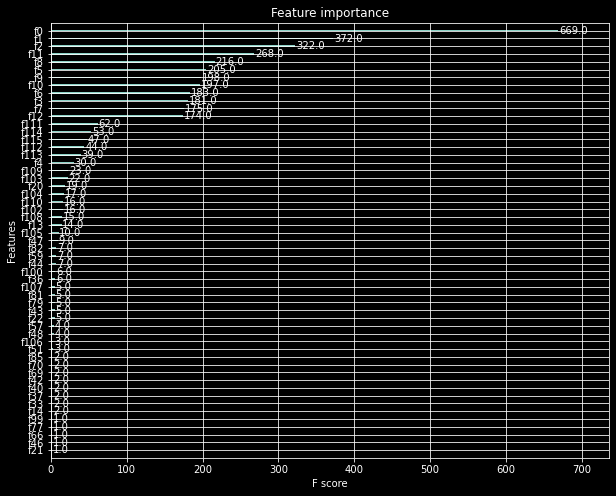

Best score for training: 0.05186408285709487
Best hyperparameters:  {'alpha': 0.1, 'colsample_bytree': 0.6, 'lambda': 0.1, 'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 3, 'objective': 'reg:squarederror'}


TypeError: cv() got an unexpected keyword argument 'df'

<Figure size 720x576 with 0 Axes>

In [56]:
y_pred, cv_results = scr.xgboost_det(
    df=df_flights_pass_weather,
    target='arr_delay',
    params=parameter_candidates,
    cv_params=cv_parameters,
    features=features_list,
    gridsearch=True,
    scaler='minmax',
    )

In [ ]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,44.646682,1.242404,44.892328,4.751500
1,43.568203,0.994601,44.651096,4.932266
2,42.965443,1.242391,44.548790,4.730438
3,42.562669,1.157294,44.360941,4.872215
4,42.057714,0.991851,44.241037,4.922517
5,41.716217,1.034400,44.238607,4.832155


In [ ]:
y_pred

array([ 1.26013842e+01,  5.07120991e+00, -4.71883237e-01,  1.04455917e+02,
       -1.42280941e+01, -1.45246716e+01, -6.74107313e+00, -5.66258192e+00,
        3.27011566e+01, -4.56860209e+00, -1.34129548e+00,  1.41810250e+00,
        2.68281441e+01, -9.09787846e+00,  8.33067894e+00,  3.28774858e+00,
       -9.13692951e+00,  9.10815964e+01, -1.47170043e+00, -1.55744143e+01,
        1.18837938e+01,  4.83523321e+00,  1.98346367e+01, -9.25419033e-01,
       -1.05111294e+01, -1.00624437e+01, -4.60996151e+00, -9.00304031e+00,
        2.92688155e+00,  3.00041842e+00, -4.45204401e+00,  3.95995474e+00,
        4.15616760e+01,  4.33590591e-01,  3.18110967e+00, -1.02698679e+01,
       -2.24194789e+00, -5.73876238e+00,  2.99268866e+00, -1.16821079e+01,
        2.55504322e+00, -8.48759651e+00, -1.47029877e+01, -3.66870117e+00,
       -1.05293703e+01,  4.41503477e+00, -1.41947818e+00,  2.48892593e+01,
       -1.13278618e+01,  9.57273769e+00,  1.94667065e+00,  1.40725574e+01,
        4.14559841e-01,  

##### Best parameters:
```python
{'alpha': 0,
'colsample_bytree': 0.6,
'lambda': 0,
'learning_rate': 0.1,
'max_depth': 3,
'n_estimators': 6,
'objective': 'reg:squarederror'}
```

### `flights`

As a matter of timing, dates are important. Also gather different times during the day.
- **`fl_date`**: Flight Date (yyyy-mm-dd). Analyse monthly changes. HOT-ENCODE months, holidays.
- **`unique_carrier`**: Unique Marketing Carrier Code. <-- analise for trends first.
- **`branded_code_share`**: Reporting Carrier Operated or Branded Code Share Partners. HOT-ENCODE binary, code-shared vs not.
- **`carrier_fl_num`**: Flight Number, monthly count may reveal flight density.
- **`origin`**: Origin Airport. Less than dest. Check for null values.
- **`dest`**: Destination Airport
- **`air_time`**: Airborne Time (minutes)
- **`arr_time`**: Actual Arrival Time (local time: hhmm). Might reveal docking delays due to time of day.
- **`dep_time`**: Actual Departure Time (local time: hhmm). Might reveal passenger delays due to time of day.
- **`distance`**: Distance between airports (miles)
- **`taxi_out`**: from wheels down to gate, in Minutes
- **`taxi_in`**: from gate to wheels off, in Minutes
- **`diverted`**: Diverted Flight Indicator (1=Yes)

### `passengers`

- **`departures_performed`**: Departures Performed
- **`passengers`**: Non-Stop Segment Passengers Transported
- **`payload`**: Available Payload (pounds)
- **`distance_group`**: Distance Intervals, every 500 Miles, for Flight Segment
- **`class`**: Service Class

### ```fuel_consumption```

### `flights_test`

In [ ]:
# groupby to aggregrate delay based on tail_num
tail_delay = df_flights[['tail_num', 'arr_delay']].groupby('tail_num').aggregate('mean')
tail_delay.reset_index(inplace=True)

# merge
df_flights = pd.merge(df_flights, tail_delay, how='left', on='tail_num')

# check arr_delay based on tail_num
df_flights[df_flights[['tail_num', 'arr_delay_y']]['tail_num'] == 'N798SW'][['tail_num', 'arr_delay_y']]

In [ ]:
df_flights['dep_time'][0]

545.0

In [ ]:
df_flights.columns.to_list()

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay_x',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name',
 'arr_delay_y']